In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
start='2010-01-01'
end='2023-11-21'
df = pdr.get_data_yahoo("AAPL", start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490199,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-14,187.699997,188.110001,186.300003,187.440002,187.440002,60108400
2023-11-15,187.850006,189.500000,187.779999,188.009995,188.009995,53790500
2023-11-16,189.570007,190.960007,188.649994,189.710007,189.710007,54412900
2023-11-17,190.250000,190.380005,188.570007,189.690002,189.690002,50922700
2023-11-20,189.889999,191.910004,189.880005,191.449997,191.449997,46505100


In [4]:
df = df.reset_index()
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490199,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [5]:
df=df.drop(['Date' , 'Adj Close'], axis = 1)
df.head()


,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


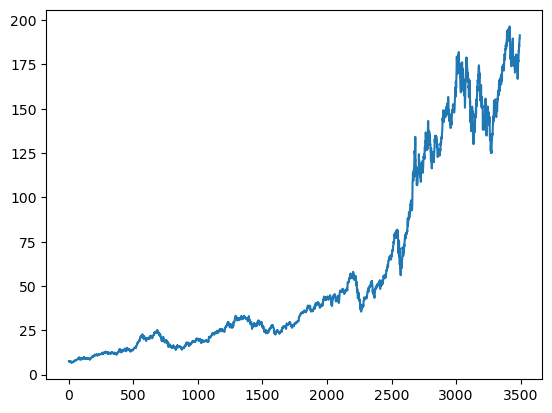

In [6]:
plt.plot(df.Close)

In [7]:
ma100 = df.Close.rolling(100).mean()
# ma = moving average

In [8]:
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3490    181.552401
3491    181.579801
3492    181.596301
3493    181.600701
3494    181.619301
Name: Close, Length: 3495, dtype: float64

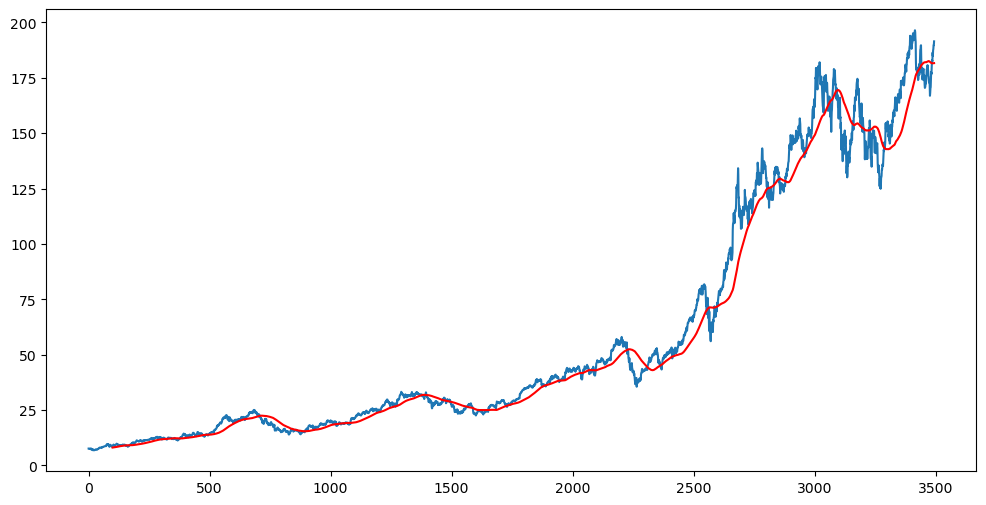

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100 ,'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3490    172.94750
3491    173.16610
3492    173.38750
3493    173.58185
3494    173.76660
Name: Close, Length: 3495, dtype: float64

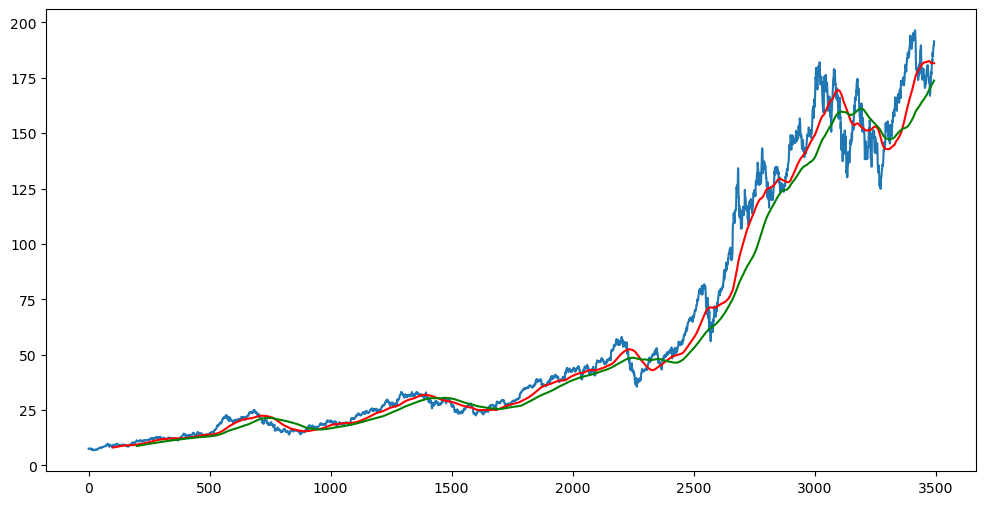

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(3495, 5)

In [13]:
# splitting data into training and testing - 70% data = training and 30% data = testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2446, 1)
(1049, 1)


In [14]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [15]:
data_testing.head()

,Close
2446,54.680000
2447,54.419998
2448,55.257500
2449,54.972500
2450,54.705002


In [16]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.95455306],
       [0.94570802],
       [0.92992371]])

In [18]:
X_train = []
Y_train = []
for i in range(100,data_training_array.shape[0]):
    X_train.append(data_training_array[i-100: i])
    Y_train.append(data_training_array[i, 0])
    
X_train,Y_train = np.array(X_train),np.array(Y_train)# np = numpi array

In [19]:
X_train.shape

(2346, 100, 1)

In [21]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences = True,
              input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation='relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80,activation='relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
model.compile(optimizer = 'adam',loss='mean_squared_error')
model.fit(X_train,Y_train,epochs=50)


Epoch 1/50

74/74 [==============================] - 14s 117ms/step - loss: 0.0301
Epoch 2/50
74/74 [==============================] - 9s 115ms/step - loss: 0.0076
Epoch 3/50
74/74 [==============================] - 9s 115ms/step - loss: 0.0065
Epoch 4/50
74/74 [==============================] - 9s 118ms/step - loss: 0.0058
Epoch 5/50
74/74 [==============================] - 9s 116ms/step - loss: 0.0058
Epoch 6/50
74/74 [==============================] - 9s 117ms/step - loss: 0.0055
Epoch 7/50
74/74 [==============================] - 10s 137ms/step - loss: 0.0045
Epoch 8/50
74/74 [==============================] - 11s 145ms/step - loss: 0.0047
Epoch 9/50
74/74 [==============================] - 10s 141ms/step - loss: 0.0047
Epoch 10/50
74/74 [==============================] - 10s 138ms/step - loss: 0.0042
Epoch 11/50
74/74 [==============================] - 11s 147ms/step - loss: 0.0038
Epoch 12/50
74/74 [==============================] - 12s 157ms/step - loss: 0.0040
Epoch 13/50
74/7

In [25]:
model.save('keras_model.h5')

C:\Users\preet\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
data_testing.head()

,Close
2446,54.680000
2447,54.419998
2448,55.257500
2449,54.972500
2450,54.705002


In [27]:
past_100_days = data_training.tail(100)


In [28]:
final_df = past_100_days._append(data_testing, ignore_index=True)

In [29]:
final_df.head()

,Close
0,52.630001
1,52.287498
2,52.937500
3,52.119999
4,50.715000


In [30]:
input_data = scaler.fit_transform(final_df)

In [31]:
input_data

array([[0.06076735],
       [0.0585306 ],
       [0.06277551],
       ...,
       [0.95598374],
       [0.9558531 ],
       [0.96734694]])

In [32]:
input_data.shape

(1149, 1)

In [33]:
X_test = []
Y_test = []
for i in range(100,input_data.shape[0]):
    X_test.append(input_data[i-100:i])
    Y_test.append(input_data[i,0])

In [ ]:
X_test, Y_test=np.array(X_test),np.array(Y_test)
print(X_test.shape)
print(Y_test.shape)

(1011, 100, 1)
(1011,)


In [ ]:
# making predictions
Y_predicted = model.predict(X_test)

In [ ]:
Y_predicted.shape

(755, 1)

In [ ]:
Y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [ ]:
Y_predicted

array([[0.12725617],
       [0.12807873],
       [0.12888159],
       [0.12962876],
       [0.13028897],
       [0.13083631],
       [0.13125634],
       [0.13155241],
       [0.13174412],
       [0.13185926],
       [0.13193238],
       [0.13199368],
       [0.13206717],
       [0.13217592],
       [0.13233645],
       [0.13255666],
       [0.13283865],
       [0.13317856],
       [0.13356811],
       [0.13400643],
       [0.1344922 ],
       [0.13502237],
       [0.13558944],
       [0.13619067],
       [0.13685778],
       [0.13762972],
       [0.13855161],
       [0.13966998],
       [0.14102988],
       [0.14263542],
       [0.14448884],
       [0.14655903],
       [0.14884949],
       [0.1513603 ],
       [0.15408404],
       [0.15700404],
       [0.1600978 ],
       [0.16333748],
       [0.1666787 ],
       [0.17008777],
       [0.17353743],
       [0.17699848],
       [0.18044946],
       [0.18387644],
       [0.18726978],
       [0.19061644],
       [0.19390103],
       [0.197

In [ ]:
scaler.scale_

array([0.02123255])

In [ ]:
scale_factor = 1/0.02123255
Y_predicted = Y_predicted*scale_factor
Y_test = Y_test*scale_factor

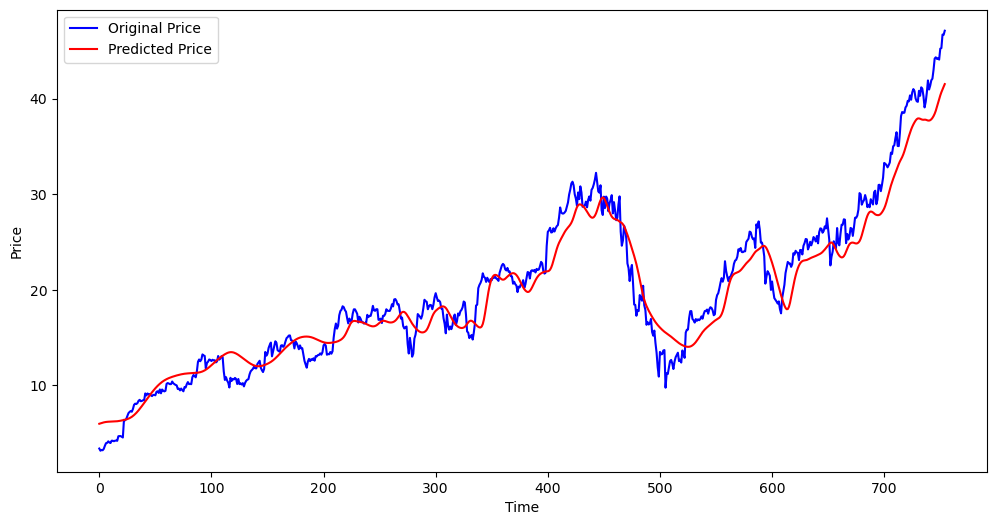

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(Y_test,'b',label='Original Price')
plt.plot(Y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()